# How to develop Multiple Clustering Algorithms at Once With scikit-learn?

The purpose here is to apply multiple clustering algorithms to the iris dataset and calculate their performance using 
different evaluation metrics 

iris dataset link :https://archive.ics.uci.edu/ml/machine-learning-databases/iris/

The iris dataset is a famous multi-class classification dataset that contains 150 samples of iris flowers, 
each having four features (length and width of sepals and petals).


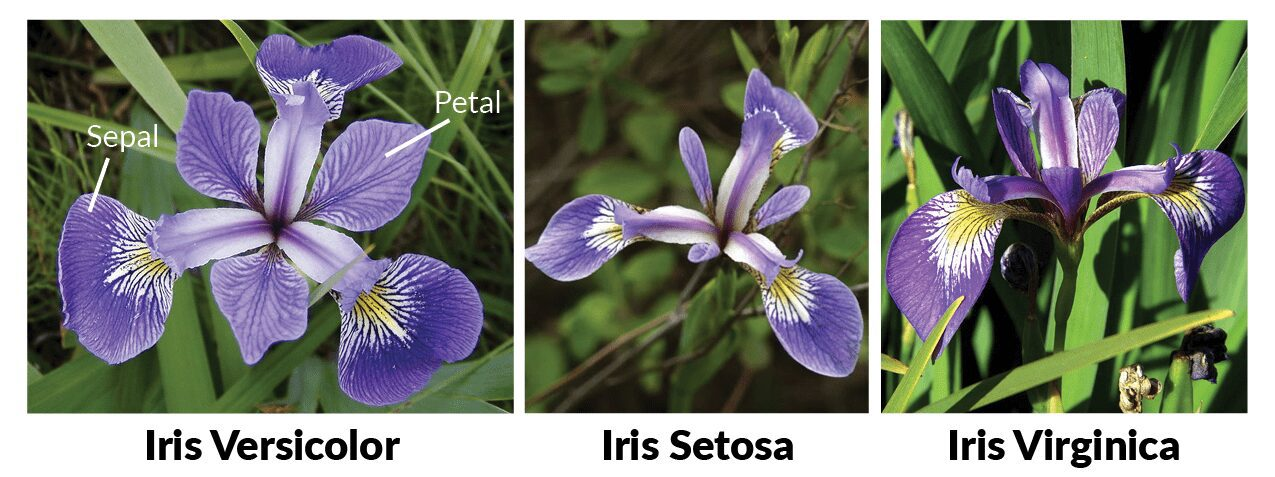


There are three classes in the dataset representing three types of iris flowers.
This dataset is commonly used in machine learning and pattern recognizing tasks, particulary for comparing and testing
different classfication algorithms

# Implementation of five clustering algorithms 
# (DBSCAN, K-Means, Hierarchical Clustering, Gaussian Mixture Model, and Mean Shift),
 # and evaluates their performance using five metrics.

To do that, we will add the evaluation metrics and algorithms in the dictionaries and apply them with
two for loops each other.



In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import(
    DBSCAN,
    KMeans,
    AgglomerativeClustering,
    MeanShift,
)

from sklearn.mixture import GaussianMixture
from sklearn.metrics import(
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score,
    rand_score,
    fowlkes_mallows_score,
    
)

#Load the iris dataset
iris=load_iris()
X=iris.data
y=iris.target

#Implement clustering algorithms
dbscan=DBSCAN(eps=0.5,min_samples=5)
kmeans=KMeans(n_clusters=3,random_state=42)
agglo=AgglomerativeClustering(n_clusters=3)
gmm=GaussianMixture(n_components=3,covariance_type='full')
ms=MeanShift()

# Define an empty DataFrame to store the results
pred_df = pd.DataFrame(columns=['Algorithm', 'Metric', 'Score'])


# Evaluate three clustering algorithms with three evaluation metrics
labels={
    'DBSCAN':dbscan.fit_predict(X),
    'K-Means':kmeans.fit_predict(X),
    'AgglomerativeClustering':agglo.fit_predict(X),
    'MeanShift':ms.fit_predict(X)

}

metrics={
    'Silhouette Score':silhouette_score,
    'Calinski Harabasz':calinski_harabasz_score,
    'Davies Bouldin Score':davies_bouldin_score,
    'Rand Score':rand_score, 
    'Fowlkes-Mallows Score':fowlkes_mallows_score,
}

for name, label in labels.items():
    for metric_name, metric_func in metrics.items():
   #But we have an exception here. The rand_score and fowlkes_mallows_score functions compare
    #clustering results with true labels, so we will add the if-else block to provide that.
      
        if metric_name in['Rand Score','Fowlkes-Mallows Score']:

            score=metric_func(y,label)
        else:
            score=metric_func(X,label) 
        pred_df=pred_df.append(
            {'Algorithm': name, 'Metric': metric_name, 'Score': score},
            ignore_index=True)
# Display the dataframe
pred_df.head(10)


C:\Users\KIRAN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KIRAN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\KIRAN\AppData\Local\Temp\ipykernel_20080\611810827.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred_df=pred_df.append(
C:\Users\KIRAN\AppData\Local\Temp\ipykernel_20080\611810827.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred_df=pred_df.append(
C:\Users\KIRAN\AppData\L

,Algorithm,Metric,Score
0,DBSCAN,Silhouette Score,0.486034
1,DBSCAN,Calinski Harabasz,220.297515
2,DBSCAN,Davies Bouldin Score,7.222448
3,DBSCAN,Rand Score,0.771902
4,DBSCAN,Fowlkes-Mallows Score,0.705385
5,K-Means,Silhouette Score,0.552819
6,K-Means,Calinski Harabasz,561.627757
7,K-Means,Davies Bouldin Score,0.661972
8,K-Means,Rand Score,0.879732
9,K-Means,Fowlkes-Mallows Score,0.820808


Now let` make visualization to see the result better.


The following code pivotes the data to have algorithms as columns and metrics as rows and then generates bar charts
for each metrc.

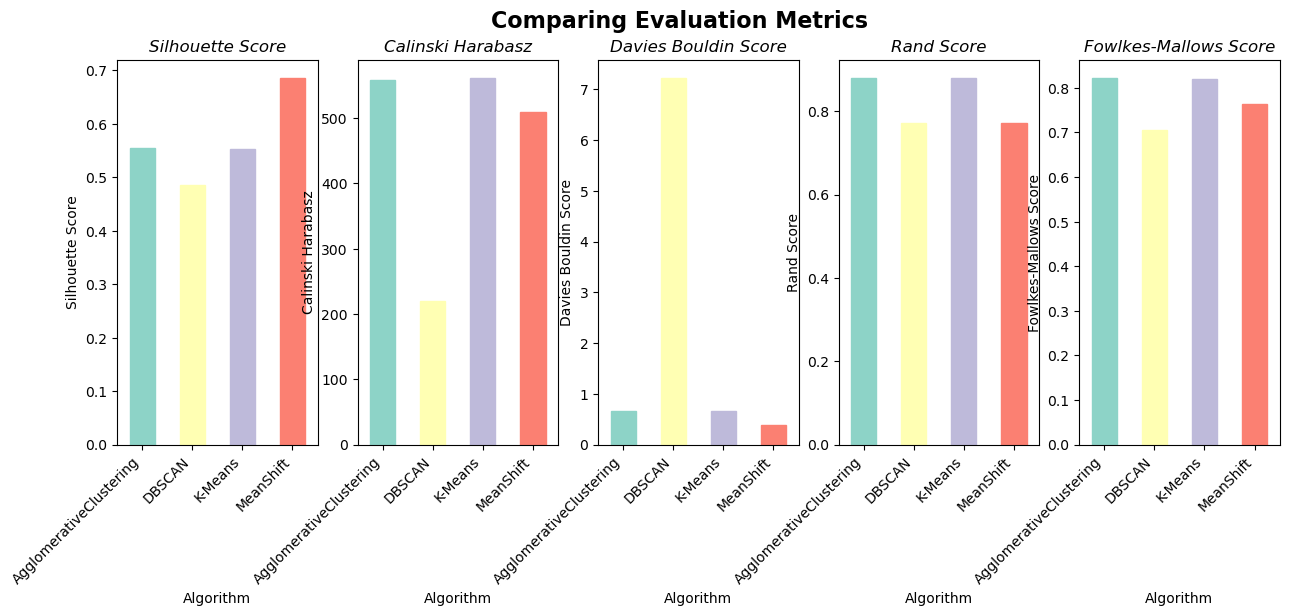

In [51]:
# pivote the data to have algorithms as columns and metrics as rows

pivoted_df=pred_df.pivot(
    index='Metric', columns='Algorithm',values='Score'
 )

#Define the three metrics to plot

metrics=[
    "Silhouette Score",
    "Calinski Harabasz",
    "Davies Bouldin Score",
    'Rand Score',
    'Fowlkes-Mallows Score',
]


#Define a color map to use for each algorithm

cmap=plt.get_cmap('Set3')

#plot a bar chart for each metric

fig,axs= plt.subplots(nrows=1,ncols=5,figsize=(15,5))

## Add a main title to the figure
fig.suptitle('Comparing Evaluation Metrics',fontsize=16,fontweight='bold')

for i, metric in enumerate(metrics):
    ax=pivoted_df.loc[metric].plot(kind='bar',ax=axs[i],rot=45)
    ax.set_xticklabels(ax.get_xticklabels(),ha='right')
    ax.set_ylabel(metric)
    ax.set_title(metric,fontstyle='italic')
    
    #Iterate through the algorithm names and set the color for each bar
    
    for j,alg in enumerate(pivoted_df.columns):
        ax.get_children()[j].set_color(cmap(j))
plt.show()

In summary, the Mean Shift algorithm performs the best according to the Silhouette Score and Davies Bouldin Score.

The K-Means algorithm performs the best according to the Calinski Harabasz Score, and GMM performs the best according to the Rand Score and Fowlkes-Mallows Score.

There is no clear winner among the clustering algorithms, as each one performs well on different metrics.

The choice of the best algorithm depends on the specific requirements and the importance assigned to each evaluation metric in your clustering problem.

 



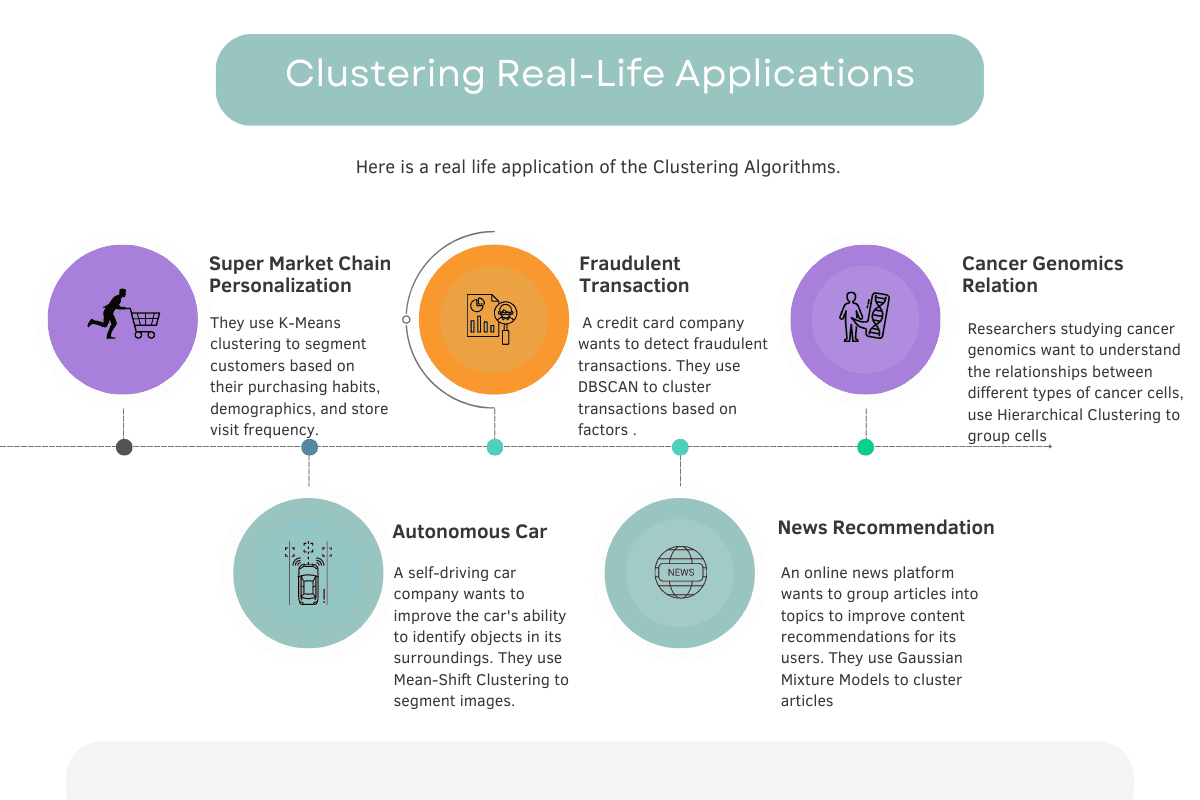